# Exploratory Data Analysis 

## All the Roles Worldwide

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data

df = pd.read_parquet('C:/Users/uzivatel/Desktop/projekty/data_jobs_python/data_jobs.parquet')

# A bit of cleaning up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Convert to a datetime datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert from 'str' to a list
df.sort_values(by='job_posted_date', inplace=True) # Sort the data by the date the job was added

# Goals

1. Explore the highest-paying positions and sought-after skills within the field of data science.
2. Utilize Python to analyze a dataset of actual job postings.
3. For job seekers: leverage these findings to identify optimal career opportunities.

# Key inquiries to address:

1. What are the primary skills required for the top 3 most popular data roles?
2. How are the trending skills evolving for Analysts Roles?
3. What is the earning potential for Data Roles based on their skills?
4. Which skill offers the best combination of high demand and high pay for Analysts Roles?

### Roles to Discover

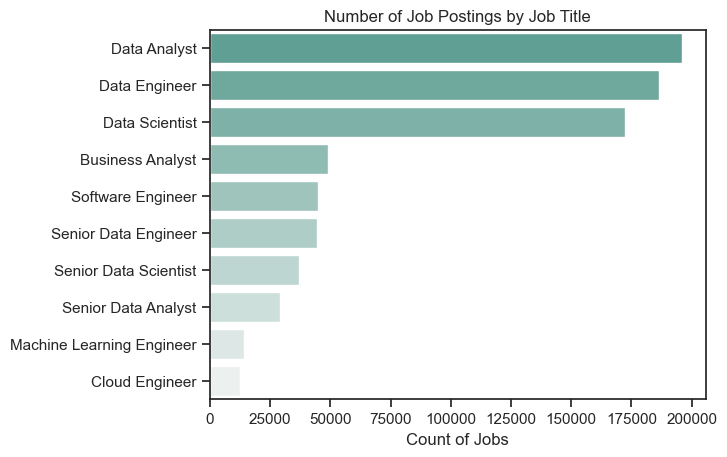

In [149]:
# Count occurrences of each job title
df_plot = df['job_title_short'].value_counts().reset_index()
df_plot.columns = ['job_title_short', 'count']  # Rename columns after resetting index

# Plot using seaborn barplot
sns.barplot(data=df_plot, x='count', y='job_title_short', palette='light:#5A9_r')

# Add labels and show plot
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.title('Number of Job Postings by Job Title')
plt.show()

### Countries to Discover

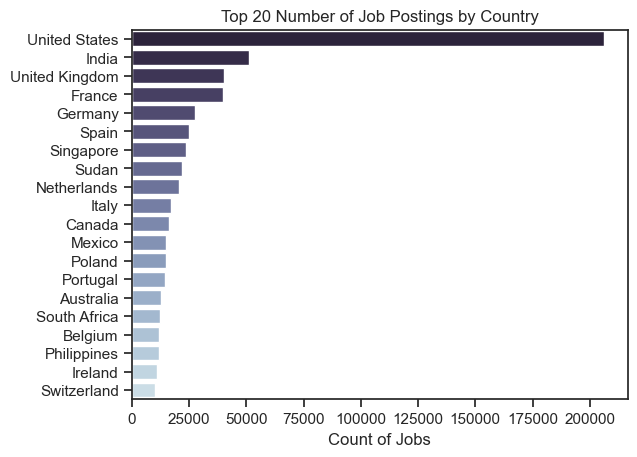

In [202]:
# Count occurrences of job offers by country (Top 20)
df_plot = df['job_country'].value_counts().to_frame().head(20).reset_index()
df_plot.columns = ['job_country', 'count']  # Rename columns after resetting index

# Plot using seaborn barplot
sns.barplot(data=df_plot, x='count', y='job_country', palette='ch:s=.25,rot=-.25_r')

# Add labels and show plot
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.title('Top 20 Number of Job Postings by Country')
plt.show()

### Companies to Discover

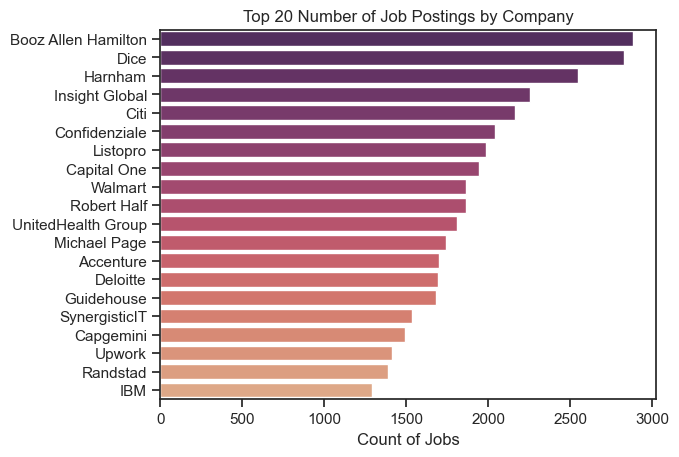

In [204]:
# Count occurrences of job offers by company (Top 20)
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20).reset_index() # It was necessary to skip the first company because it was probably a mistake
df_plot.columns = ['company_name', 'count']  # Rename columns after resetting index

# Plot using seaborn barplot
sns.barplot(data=df_plot, x='count', y='company_name', palette='flare_r')

# Add labels and show plot
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.title('Top 20 Number of Job Postings by Company')
plt.show()

The code below creates 3 pie charts to visualize the distribution of job postings based on specific criteria:

- job_work_from_home: Shows whether a home office is available.

- job_no_degree_mention: Indicates if a degree requirement is mentioned.

- job_health_insurance: Displays whether health insurance is offered.

Each pie chart presents the percentage of job postings that meet these criteria (True) versus those that do not (False).

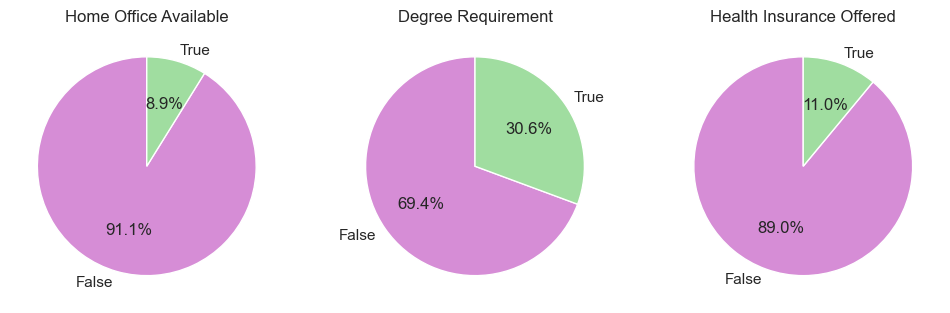

In [182]:
dict_column = {
    'job_work_from_home': 'Home Office Available',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

colors = ['#d68dd6', '#a0dda0']

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax[i].set_title(title)

plt.show()

# Filter only 'Analyst' roles

In [44]:
df['job_title_short'].unique() # Only look for Data Analyst, Senior Data Analyst and Business Analyst

array(['Data Analyst', 'Senior Data Analyst', 'Data Engineer',
       'Business Analyst', 'Senior Data Engineer', 'Data Scientist',
       'Senior Data Scientist', 'Machine Learning Engineer',
       'Software Engineer', 'Cloud Engineer'], dtype=object)

# Only want roles located in Czechia and neighbouring countries 

### These countries are Poland, Germany, Austria and Slovakia

In [205]:
roles = ['Data Analyst', 'Senior Data Analyst', 'Business Analyst']
countries = ['Czechia','Poland','Germany','Austria','Slovakia']
df_eur_jobs = df[(df['job_country'].isin(countries)) & (df['job_title_short'].isin(roles))]
print(f'We have {len(df_eur_jobs)} unique jobs in the region, that meets the criteria.')

We have 19295 unique jobs in the region, that meets the criteria.


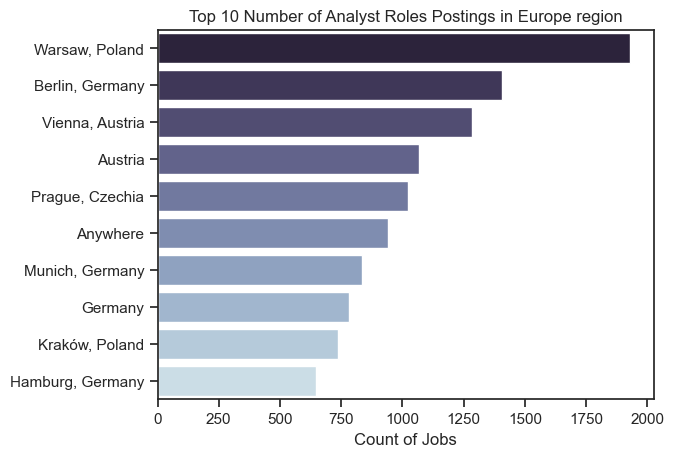

In [196]:
# Count occurrences of job offers by location in the central Europe region (Top 10)
df_plot = df_eur_jobs['job_location'].value_counts().head(10).to_frame().reset_index()
df_plot.columns = ['job_location', 'count']  # Rename columns after resetting index

# Plot using seaborn barplot
sns.barplot(data=df_plot, x='count', y='job_location', palette='ch:s=.25,rot=-.25_r')

# Add labels and show plot
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.title('Top 10 Number of Analyst Roles Postings in Europe region')
plt.show()

In the chart above you can see job offers in Central Europe (Czech Republic, Poland, Germany, Austria and Slovakia) for Data Analyst, Senior Data Analyst and Business Analyst roles.

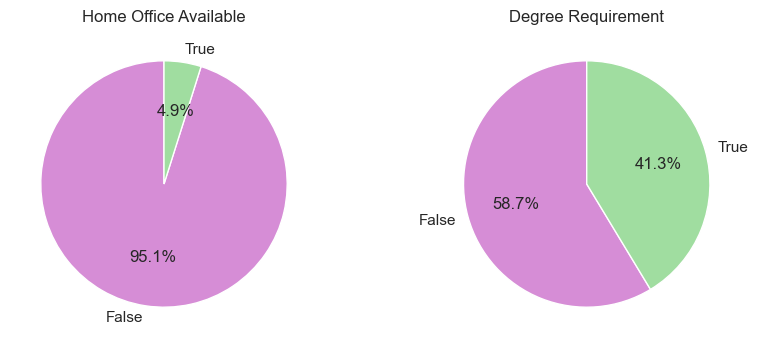

In [201]:
dict_column = {
    'job_work_from_home': 'Home Office Available',
    'job_no_degree_mention': 'Degree Requirement'
}

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

colors = ['#d68dd6', '#a0dda0']

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_eur_jobs[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax[i].set_title(title)

plt.show()

If we compare the total of all job offers worldwide and job offers only in the "Central Europe", we can see that Home Office is enabled for 8.9% of job offers worldwide and in the European region only for 4.9% of job offers. Worldwide, the degree is required for more than 30% of job offers, but in the European region it is required for **more than 40% of job offers!** On the other hand, health insurance has a very different role in Europe than in the United States and elsewhere. It therefore does not make much sense to compare these regions. It is not nearly as much of a benefit in Europe as it is in the United States.

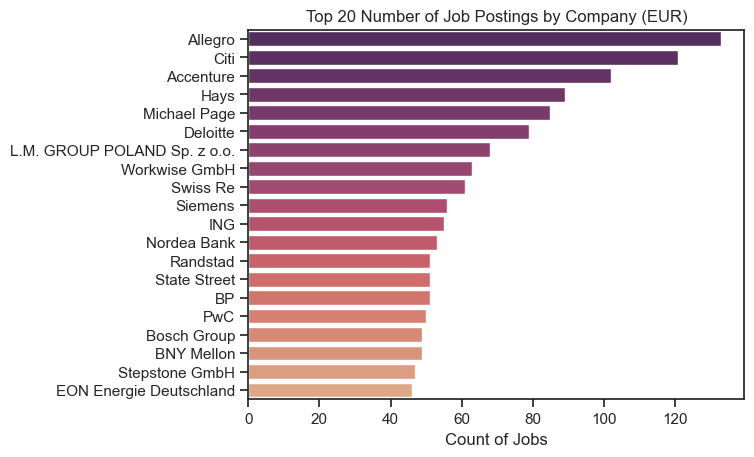

In [211]:
# Count occurrences of job offers by company (Top 20) in European region
df_plot = df_eur_jobs['company_name'].value_counts().to_frame().head(20).reset_index() 
df_plot.columns = ['company_name', 'count']  # Rename columns after resetting index

# Plot using seaborn barplot
sns.barplot(data=df_plot, x='count', y='company_name', palette='flare_r')

# Add labels and show plot
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.title('Top 20 Number of Job Postings by Company (EUR)')
plt.show()

Polish giant Allegro offers the largest range of analyst roles. Some companies such as Citi, Accenture and Deloitte were also at the top of the worldwide job offers. In contrast to the worldwide offers, e.g. the very prominent consulting firm PwC appeared here.